## Analysis of 200 mesh network
### 1. plot the connection
### 2. plot the voltage


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

location_file = "/home/zmd/Snudda/200Sim/simulation/3d_point_location.txt"
connection_file = "/home/zmd/Snudda/200Sim/simulation/connection_file.txt"
voltage_file = "/home/zmd/Snudda/200Sim/simulation/volt.txt"

In [2]:
# get the 3d point location
location = {}
for line in open(location_file,"r"):
    x, y, z, _, _, _, _, id = line.split()
    location[int(id)] = [float(x), float(y), float(z)]

## 1. plot the connection

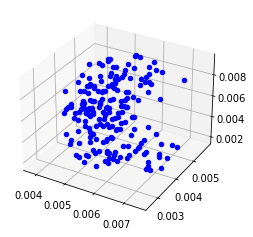

In [4]:
# show the connection number
fig_conn = plt.figure('3D scatter plot')
ax = fig_conn.add_subplot(111, projection='3d')
for line in open(connection_file, "r"):
    id, con_in, syn_in, con_out, syn_out = line.split()
    x,y,z = location[int(id)]
    ax.scatter(x,y,z, c=int(con_in), marker='o', cmap='bwr')

In [5]:
# save the upper 3d figure as a rotating gif file
from matplotlib import animation 
def rotate(angle): 
    ax.view_init(azim=angle) 
rot_animation = animation.FuncAnimation(fig_conn, rotate, frames=np.arange(0,362,50),interval=1000) 
rot_animation.save('./connection.gif', dpi=80, writer='imagemagick') 
print("saved")

MovieWriter imagemagick unavailable; using Pillow instead.
saved


## 2. plot the voltage

In [3]:
import os
fig_volt = plt.figure('3D scatter plot')
ax = fig_volt.add_subplot(111, projection='3d')
#max_v = -120
#min_v = 120
minv = -120
maxv = 60
for i in range(2000):
    #ax.cla()
    for line in open(voltage_file, "r"):
        id = line.split(',')[0]
        if id != '-1':
            v = float(line.split(',')[i+3])
            x,y,z = location[int(id)]            
            #ax.scatter(x,y,z, color=((v-minv)/(maxv-minv),0,1-(v-minv)/(maxv-minv)), marker='o')
            #if v > max_v:
            #    max_v = v
            #if v < min_v:
            #    min_v = v
    #fig_volt.show()
    #os.system("pause")
print(min_v, max_v)
    

KeyboardInterrupt: 

MovieWriter imagemagick unavailable; using Pillow instead.
0
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
saved


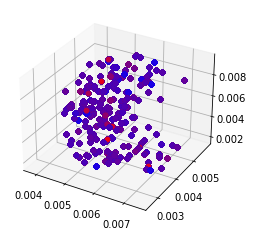

In [5]:
# show the voltage
from matplotlib import animation 
fig_volt = plt.figure('3D scatter plot')
ax = fig_volt.add_subplot(111, projection='3d')
def animate(i):
    print(i)
    minv = -120
    maxv = 60
    for line in open(voltage_file, "r"):
        id = line.split(',')[0]
        if id != '-1':
            v = float(line.split(',')[i+3])
            x,y,z = location[int(id)]
            ax.scatter(x,y,z, color=[(v-minv)/(maxv-minv),0,1-(v-minv)/(maxv-minv)], marker='o')
volt_animation = animation.FuncAnimation(fig_volt, animate, frames=np.arange(0,200,2),interval=1000) 
volt_animation.save('./voltage.gif', dpi=80, writer='imagemagick') 
print("saved")